In [35]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [36]:
data = pd.read_csv('./data/data.csv', index_col = 'Date')
data = data.iloc[:2665, :]
data

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,investment_dif,foreign_buy,foreign_sell,foreign_dif,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,51.950001,52.250000,51.700001,52.099998,37.005875,11219,0.010669,0.010613,51.943241,52.708595,...,1.454165e+09,1.551380e+10,2.549564e+10,-9.981838e+09,(96.35891982455746-4.392130046986246j),(98.34108280489028-3.3250087531151493j),(94.15768178697394-1.191703036502382j),(97.50451489876394-0.613566533349811j),(95.29038850118098-0.11542244741248453j),(94.81609402815965-0.0940096666981205j)
2010-02-22,53.049999,53.150002,52.599998,52.599998,37.361015,11187,0.009597,0.009551,52.107470,52.693884,...,7.716517e+08,2.846749e+10,2.503619e+10,3.431302e+09,(96.24219542092365-4.413314819901948j),(98.00204906710161-3.3138376849325306j),(93.59732527090016-1.1864525841025377j),(95.92937277471535-0.6197260353424595j),(90.41447063457669-0.1054337829366703j),(88.71265961120248-0.09242278692218808j)
2010-02-23,52.599998,52.750000,52.200001,52.599998,37.361015,9571,0.000000,0.000000,52.230624,52.681192,...,-3.876991e+08,2.422218e+10,2.360860e+10,6.135806e+08,(96.12514046111716-4.434313908848007j),(97.66273094367628-3.3021089225096847j),(93.03782964863684-1.1807528794971351j),(94.35236054054941-0.623774127964373j),(85.60413754797314-0.09221953701560531j),(82.7412714995874-0.08653207792989531j)
2010-02-24,52.150002,52.549999,52.150002,52.250000,37.112427,11026,-0.006654,-0.006676,52.235469,52.623011,...,4.830806e+08,2.027639e+10,2.546846e+10,-5.192070e+09,(96.00775723190716-4.455126430317517j),(97.3231531837085-3.2898244397101095j),(92.47927549986149-1.1746060808886236j),(92.77524604767282-0.6256970193459525j),(80.90760696087868-0.07618397880545691j),(76.99429606197228-0.07661185091989364j)
2010-02-25,52.250000,52.299999,51.349998,51.650002,36.686245,20361,-0.011483,-0.011550,52.089087,52.491931,...,-4.846407e+08,2.259238e+10,3.143820e+10,-8.845827e+09,(95.89004802866447-4.475751508653097j),(96.98334052173756-3.2769863039209293j),(91.92174306118679-1.1680145157722914j),(91.1997989610286-0.6254881581875618j),(76.3711938849176-0.057817691092687085j),(71.55789481266476-0.06312405866658932j)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,119.099998,119.599998,118.599998,118.949997,106.817932,2801317,0.001263,0.001262,118.587579,118.090677,...,3.734200e+08,2.930742e+10,2.403325e+10,5.274171e+09,(111.0497527299793+3.3884670014223843j),(127.32099233937222+3.362632101840056j),(121.88635005271868+0.16870973344972384j),(124.37777490744834+0.25656810445241973j),(120.60854237262843-0.034845061590118576j),(121.10021893171024+0.09238489007385198j)
2020-12-28,119.050003,120.000000,119.050003,120.000000,107.760849,3407442,0.008827,0.008789,118.940684,118.345254,...,1.390243e+08,5.145881e+10,3.850894e+10,1.294987e+10,(111.05439775203425+3.3604444899854045j),(127.48958854963783+3.353615452632191j),(122.24703090959368+0.19217600369023558j),(124.7544129973108+0.22282417775510055j),(121.3001760559209-0.013450211923810684j),(121.903124300455+0.08645220172429191j)
2020-12-29,120.050003,120.199997,119.349998,119.900002,107.671043,3093979,-0.000833,-0.000834,119.180513,118.552553,...,-7.673993e+08,4.903891e+10,5.029541e+10,-1.256509e+09,(111.0585233323733+3.3322805926065096j),(127.65640203818727+3.3440344148816266j),(122.60752594126464+0.21556950617367132j),(125.12429583064961+0.18832108808880133j),(122.06213310609351+0.00835612590899526j),(122.75717631940195+0.07649371493268387j)


Splitting exported data.csv from TaskB7.ipynb and preprocessing:

1. Target Variable Assignment: The 'Close' column from the data DataFrame is assigned to a new column 'y', which will be used as the target variable for prediction.
2. Feature and Target Extraction: The features (x) and target (y) variables are extracted from the data DataFrame. The features consist of the first 62 columns, and the target is the 63rd column (index 62 due to zero-based indexing).
3. Train-Test Split: The dataset is split into training and testing sets, with 80% of the data used for training and the remaining 20% for testing.
4. Scaling: The MinMaxScaler is used to scale both the features and the target variable to a range of 0 to 1. This is a common practice to normalize the data and ensure that all features contribute equally to the model training process.
5. Complex Number Handling: The code includes a section to handle complex numbers, which converts string representations of complex numbers to actual complex numbers and then takes only the real part. This is not typical for most datasets and suggests that the data might have some complex number entries.
6. Infinite Value Handling: The code checks for infinite values within the features and replaces them with the largest finite float64 value. This prevents issues during model training that can arise from infinite values.
7. Reshaping: The features are reshaped to their original shape if they were altered during the complex number handling process.
8. Final Scaling: The training and testing feature sets are scaled using the MinMaxScaler, and the target variable is reshaped and scaled as well.

In [20]:
data['y'] = data['Close']

x = data.iloc[:, :62].values
y = data.iloc[:, 62].values

split = int(data.shape[0]* 0.8)
train_x, test_x = x[: split, :], x[split:, :]
train_y, test_y = y[: split, ], y[split: , ]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

# Convert string representations of complex numbers to actual complex numbers
train_x = np.array([complex(val.replace('j', 'j')) if isinstance(val, str) and 'j' in val else val for val in train_x.flatten()], dtype=complex)

# Take only the real part of the complex numbers
train_x = train_x.real

# Reshape train_x back to its original shape if necessary
train_x = train_x.reshape(-1, 62) 

# Check for infinite values in 'train_x'
if np.isinf(train_x).any():
    # Replace infinities with the largest finite float64 value
    train_x[np.isinf(train_x)] = np.finfo(np.float64).max
    # Alternatively, we could use the maximum value from the non-infinite part of the data
    # max_val = np.max(train_x[~np.isinf(train_x)])
    # train_x[np.isinf(train_x)] = max_val

# Convert string representations of complex numbers to actual complex numbers in 'test_x'
test_x = np.array([complex(val.replace('j', 'j')) if isinstance(val, str) and 'j' in val else val for val in test_x.flatten()], dtype=complex)

# Take only the real part of the complex numbers in 'test_x'
test_x = test_x.real

# Reshape 'test_x' back to its original shape if necessary
test_x = test_x.reshape(-1, 62) 

# Check for infinite values in 'test_x'
if np.isinf(test_x).any():
    # Replace infinities with the largest finite float64 value
    test_x[np.isinf(test_x)] = np.finfo(np.float64).max
    # Alternatively, we could use the maximum value from the non-infinite part of the data
    # max_val = np.max(test_x[~np.isinf(test_x)])
    # test_x[np.isinf(test_x)] = max_val

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))

trainX: (2132, 62) trainY: (2132,)
testX: (533, 62) testY: (533,)


Applying VAE class into this notebook for enerative modeling (to create new data points that resemble the input training data).

In [21]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )
        
        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )       
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        ) 

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [22]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
""""
TensorDataset wraps the train_x data into a dataset that can be passed to the DataLoader. 
The train_x data is first converted from a NumPy array to a PyTorch tensor and cast to a floating-point type.
"""
model = VAE([62, 400, 400, 400, 10], 10)        # configuration for the neural network layers. 
                                                # It indicates that the input layer has 62 neurons (matching the number of features in train_x)
                                                # followed by three hidden layers each with 400 neurons, and finally a bottleneck layer with 10 neurons.
#The other 10 specifies the size of the latent dimension. 
#This is the dimensionality of the compressed representation that the VAE learns to encode the input data into.

Training Loop for VAE:
1. Set up CUDA
2. Training Configuration: set the number of epochs needed for training and learning rate.
3. Model ad Optimizer Setup: move the model to appropriate GPU/CPU + run Adam Optimizer (can modify to choose other optimization algortihms)
4. Training data (loop)
5. Plotting

[1/300] Loss: 433.72360610961914
[2/300] Loss: 419.6036605834961
[3/300] Loss: 411.4434871673584
[4/300] Loss: 410.66316413879395
[5/300] Loss: 407.12802505493164
[6/300] Loss: 397.98295402526855
[7/300] Loss: 393.6961078643799
[8/300] Loss: 392.9033479690552
[9/300] Loss: 390.01081371307373
[10/300] Loss: 384.087007522583
[11/300] Loss: 376.90842628479004
[12/300] Loss: 371.28035068511963
[13/300] Loss: 368.7886571884155
[14/300] Loss: 367.3750858306885
[15/300] Loss: 362.7754878997803
[16/300] Loss: 355.5530843734741
[17/300] Loss: 349.744234085083
[18/300] Loss: 346.2510108947754
[19/300] Loss: 343.74113178253174
[20/300] Loss: 341.1370439529419
[21/300] Loss: 337.9930992126465
[22/300] Loss: 334.1895704269409
[23/300] Loss: 329.6963634490967
[24/300] Loss: 324.6758499145508
[25/300] Loss: 319.395658493042
[26/300] Loss: 314.157320022583
[27/300] Loss: 309.34781646728516
[28/300] Loss: 305.30456829071045
[29/300] Loss: 302.00229930877686
[30/300] Loss: 298.8652057647705
[31/300] Los

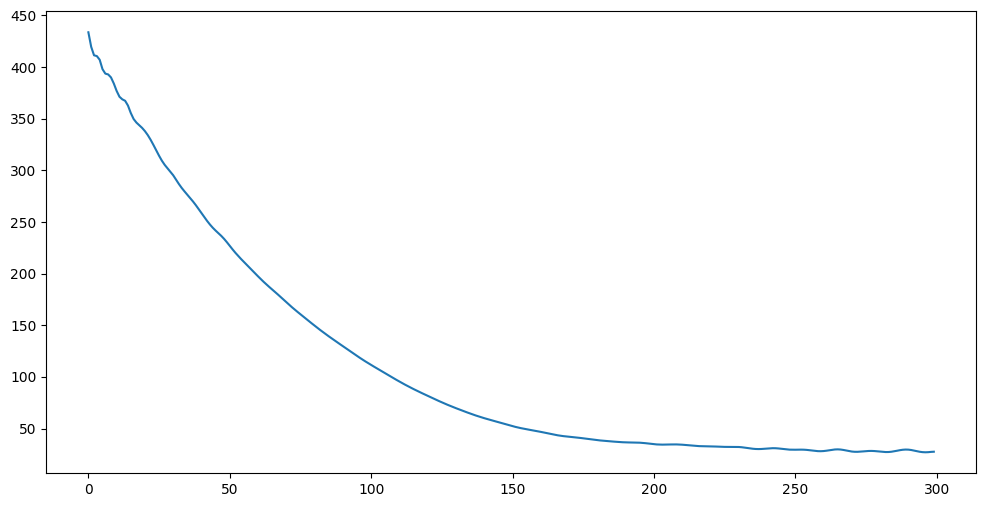

In [23]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
num_epochs = 300
learning_rate = 0.00003
model = model.to(device)   
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

hist = np.zeros(num_epochs) 
for epoch in range(num_epochs):
    total_loss = 0
    loss_ = []
    for (x, ) in train_loader:
        x = x.to(device)
        output, z, mu, logVar = model(x)
        kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(output, x) + kl_divergence
        loss.backward()
        optimizer.step()
        loss_.append(loss.item())
    hist[epoch] = sum(loss_)
    print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

plt.figure(figsize=(12, 6))
plt.plot(hist)

VAE_train_x: the reconstructed output of traning data
train_x_mu: the mean of traning data
train_x_var: the log variance of traning data
All these variables belong to the latent distribution.

the same to VAE_test_x, test_x_mu, 

The latent variables (mu and logVar) can be used for further analysis, such as visualizing the latent space or using the latent representations for downstream tasks. 

The reconstructed outputs (VAE_train_x and VAE_test_x) can be compared to the original inputs to evaluate the quality of the reconstruction.

In [24]:
model.eval()
_, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(train_x).float().to(device))
_, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(test_x).float().to(device))

Create sequences of data form time series of fixed-length input (convert to torch tensor)

In [25]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

Concatenate VAE outputs and test data to the original data (formed in splitting step above)

In [26]:
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)

Applying sliding_window() function  to transform the original train_x and test_x datasets, along with their corresponding target variables train_y and test_y, into a format suitable for time-series prediction or sequence modeling tasks.

In [27]:
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')

train_x: torch.Size([2129, 3, 72]) train_y: torch.Size([2129, 1]) train_y_gan: torch.Size([2129, 4, 1])
test_x: torch.Size([530, 3, 72]) test_y: torch.Size([530, 1]) test_y_gan: torch.Size([530, 4, 1])


Specifying appropriate parameters in Generator and Discriminator to start distinguishing between the generated data and real data.

In [28]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 3, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 3, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

Train the GAN model. 
The Generator learns to produce data that is indistinguishable from real data, and the Discriminator learns to differentiate between real and generated data. 

The training process involves a competition between the two models, improving both over time. 
The loss values indicate how well each model is performing its task. 
The Generator's loss decreases when it fools the Discriminator, and the Discriminator's loss decreases when it correctly classifies real and fake data.

In [30]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

batch_size = 128
learning_rate = 0.00016
num_epochs = 65

trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

modelG = Generator(72).to(device)
modelD = Discriminator().to(device)

criterion = nn.BCELoss()
optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.0, 0.9))
optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.0, 0.9))

histG = np.zeros(num_epochs)
histD = np.zeros(num_epochs)
count = 0
for epoch in range(num_epochs):
    loss_G = []
    loss_D = []
    for (x, y) in trainDataloader:
        x = x.to(device)
        y = y.to(device)

        fake_data = modelG(x)
        fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

        dis_real_output = modelD(y)
        real_labels = torch.ones_like(dis_real_output).to(device)
        lossD_real = criterion(dis_real_output, real_labels)


        dis_fake_output = modelD(fake_data)
        fake_labels = torch.zeros_like(real_labels).to(device)
        lossD_fake = criterion(dis_fake_output, fake_labels)

        lossD = (lossD_real + lossD_fake)

        modelD.zero_grad()
        lossD.backward(retain_graph=True)
        optimizerD.step()
        loss_D.append(lossD.item())

        output_fake = modelD(fake_data)
        lossG = criterion(output_fake, real_labels)
        modelG.zero_grad()
        lossG.backward()
        optimizerG.step()
        loss_G.append(lossG.item()) 
    histG[epoch] = sum(loss_G) 
    histD[epoch] = sum(loss_D)    
    print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')

[1/65] LossD: 23.574143767356873 LossG:12.112391710281372
[2/65] LossD: 23.567179322242737 LossG:11.845230519771576
[3/65] LossD: 23.566601872444153 LossG:11.785222589969635
[4/65] LossD: 23.566267251968384 LossG:11.782500445842743
[5/65] LossD: 23.565876960754395 LossG:11.782372117042542
[6/65] LossD: 23.565567135810852 LossG:11.783025801181793
[7/65] LossD: 23.564916491508484 LossG:11.783223867416382
[8/65] LossD: 23.56421947479248 LossG:11.783403992652893
[9/65] LossD: 23.563493371009827 LossG:11.78312611579895
[10/65] LossD: 23.562212824821472 LossG:11.78464525938034
[11/65] LossD: 23.562068343162537 LossG:11.784187138080597
[12/65] LossD: 23.559053778648376 LossG:11.785291612148285
[13/65] LossD: 23.556780457496643 LossG:11.786571443080902
[14/65] LossD: 23.55548930168152 LossG:11.7880859375
[15/65] LossD: 23.55409288406372 LossG:11.791175901889801
[16/65] LossD: 23.548930168151855 LossG:11.793205559253693
[17/65] LossD: 23.547567129135132 LossG:11.793265759944916
[18/65] LossD: 2

Display the outcome between Generator and Discriminator:

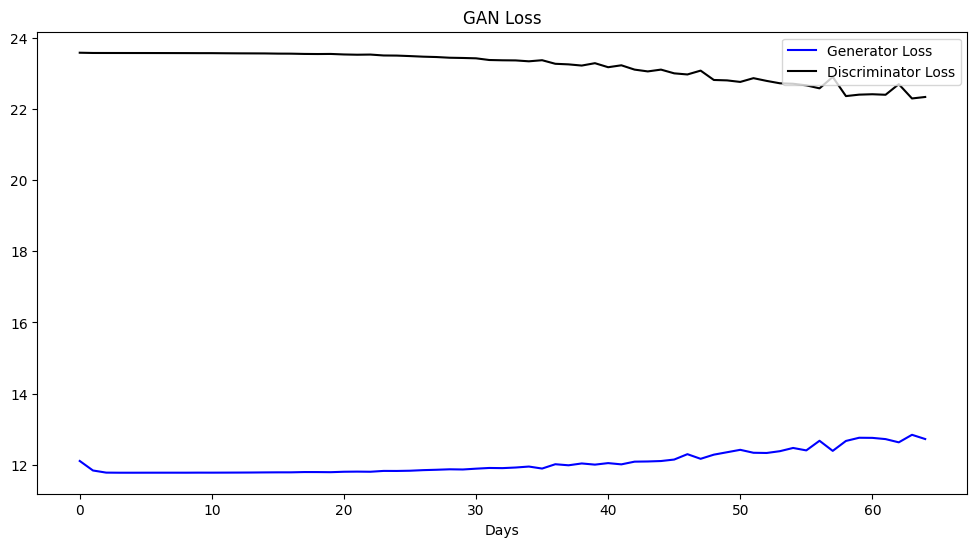

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('GAN Loss')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

Model Evaluation and Data Inversing:

In [32]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

Training Result Visualization:

Training dataset RMSE:2.5619773493854106


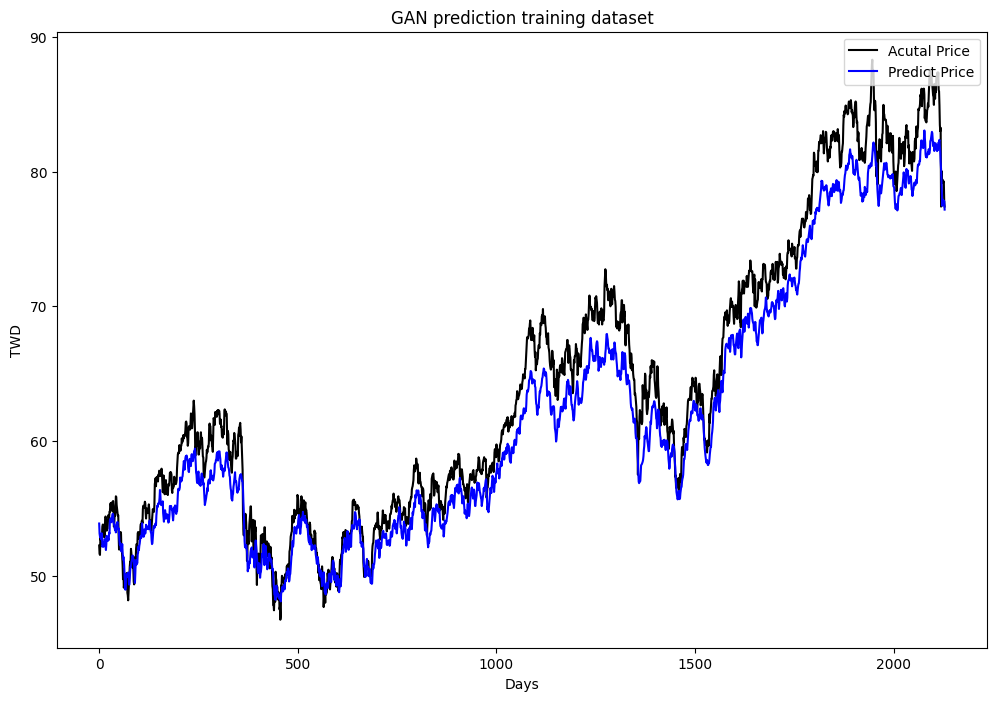

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction training dataset')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

Test Result Visualization:

Training dataset RMSE:8.948282846045936


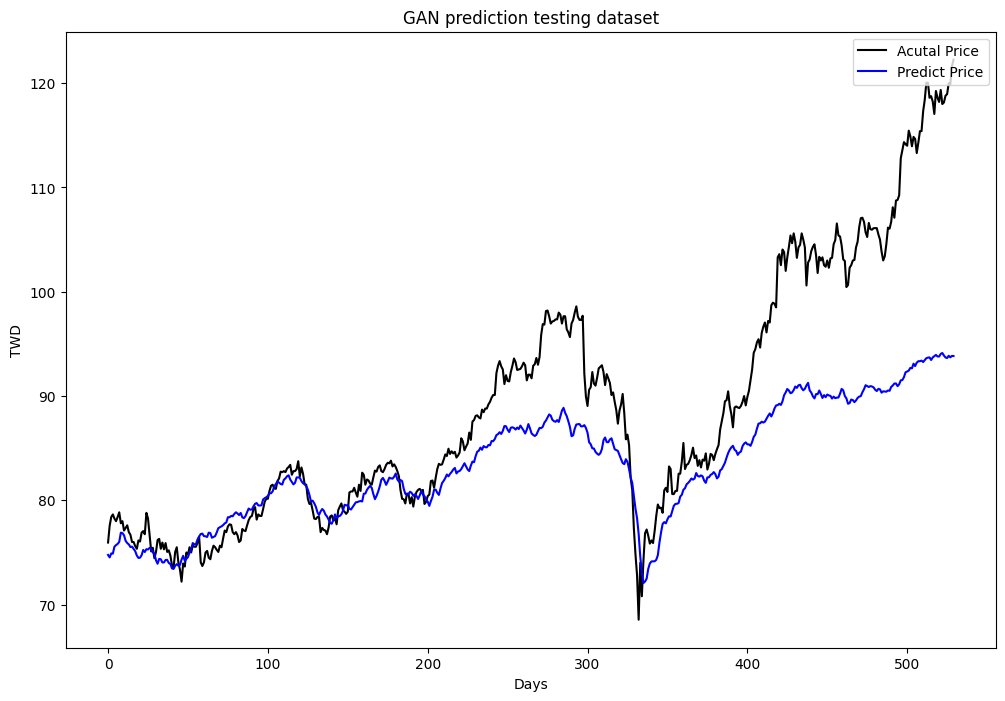

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction testing dataset')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')